In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

import pickle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

##### We need to predict the Number of predicted wins (W) so it's continous varaible as our trager variable is contious so we can sue the Regression 

# EDA

In [4]:
df.shape

(30, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


##### There is no categorial column present in the data

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [8]:
df.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

##### We can se we have no null valeus 

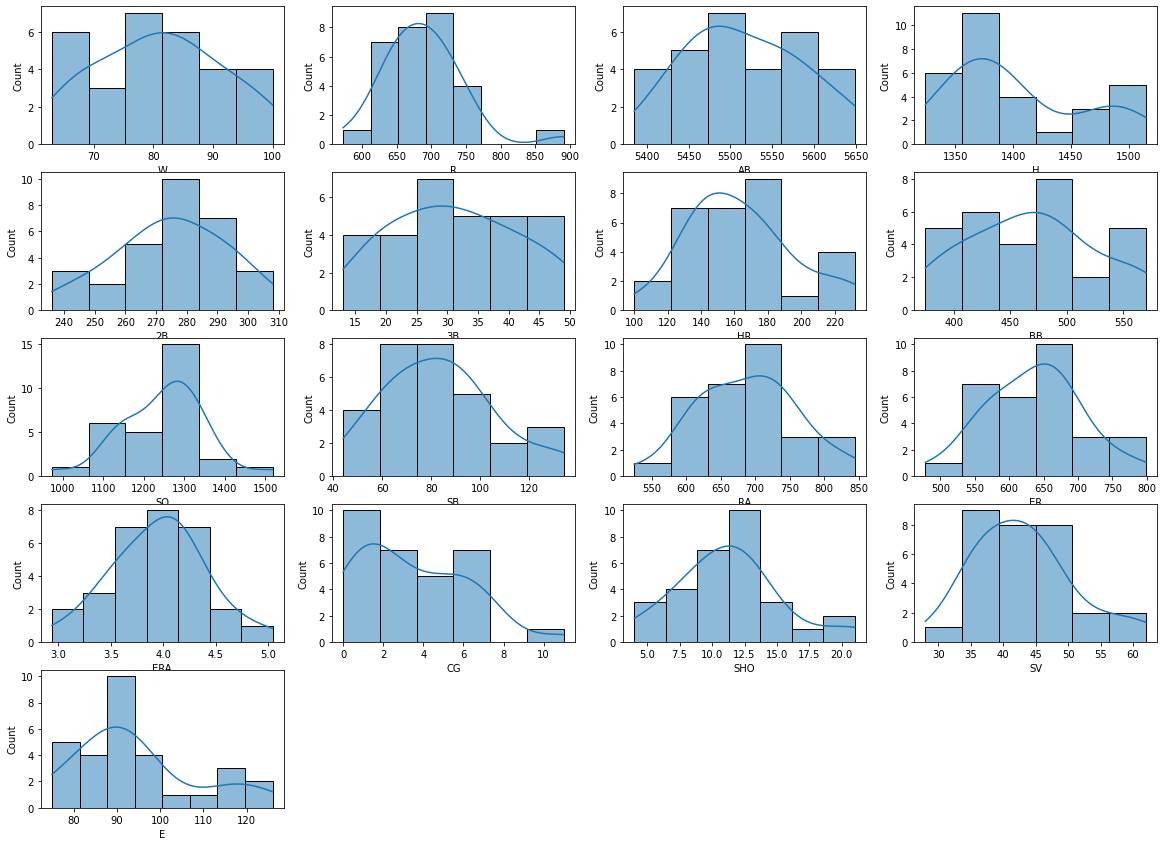

In [9]:
plt.figure(figsize=(20,30))
for i,column in enumerate(df.columns):
    plt.subplot(10,4,i+1)
    sns.histplot(df[column],kde=True)

##### We can see Data is not normally distributed

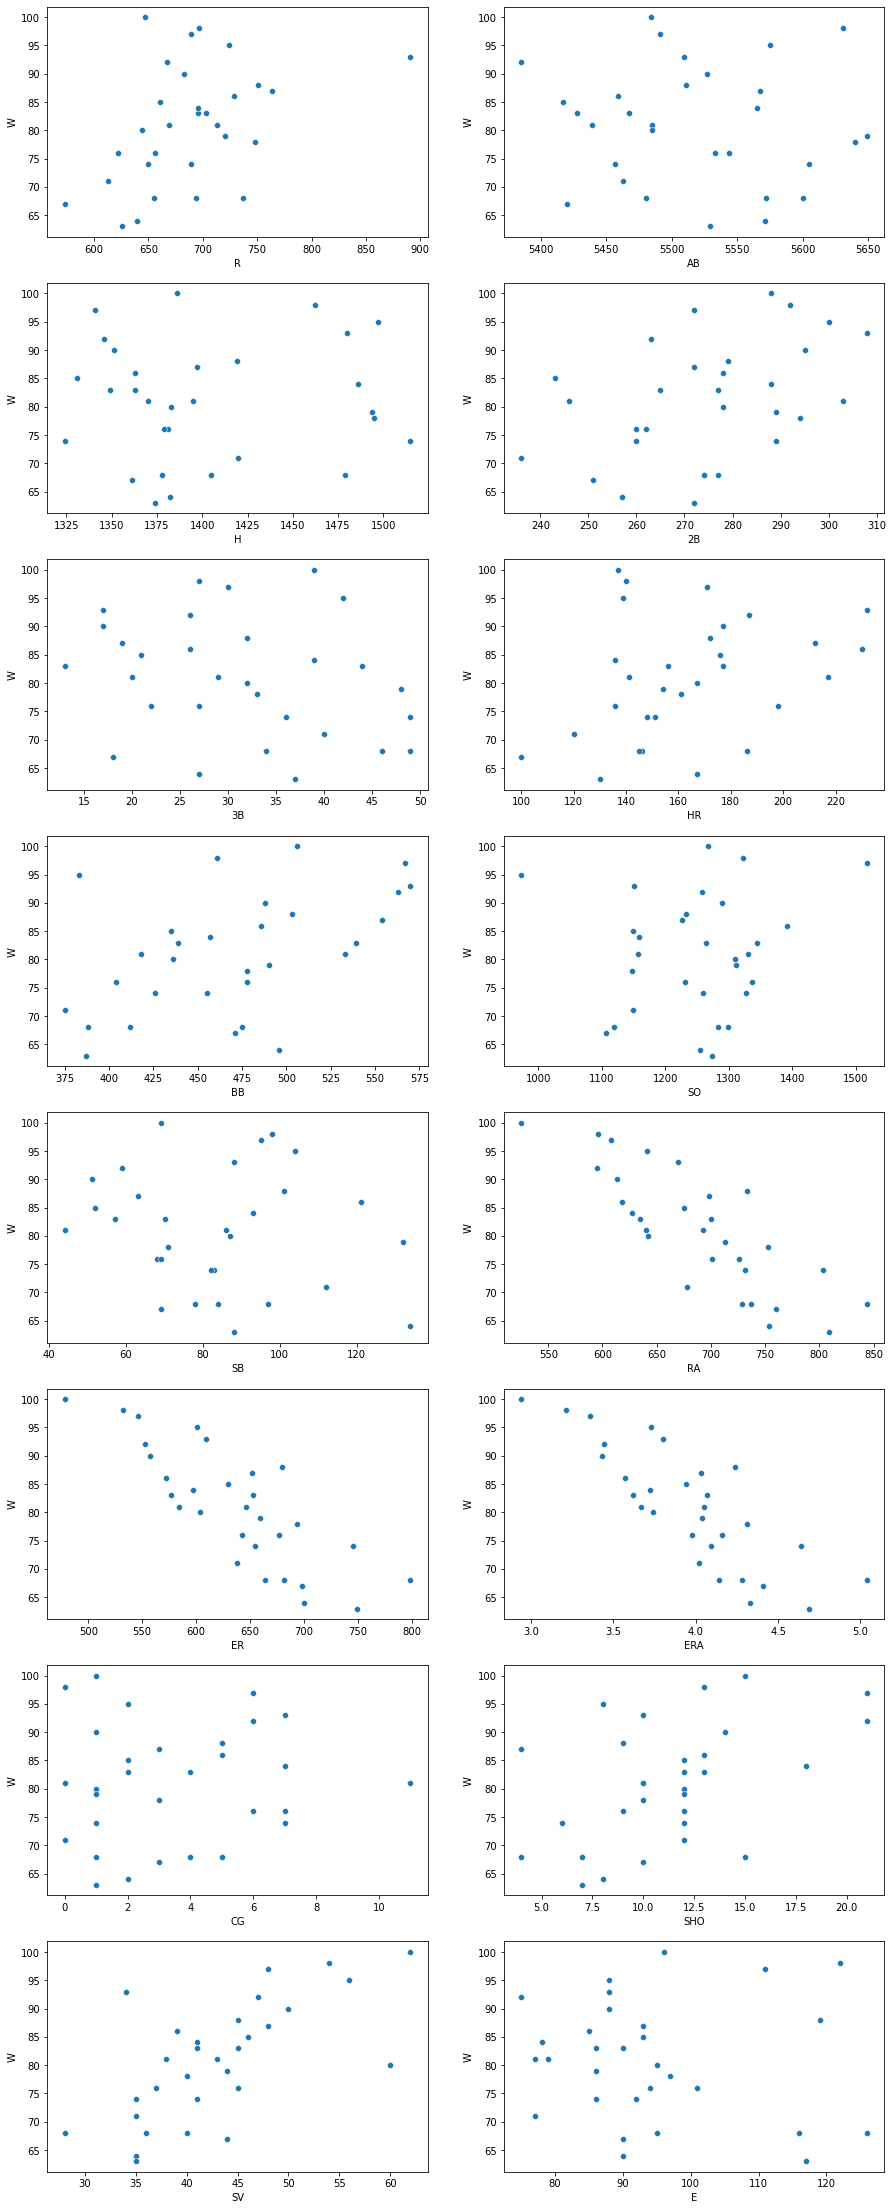

In [10]:
plt.figure(figsize=(15,50))
for i, column in enumerate(df.drop('W',axis=1).columns):
    plt.subplot(10,2,i+1)
    sns.scatterplot(df[column],df['W'])

##### We can see the following thigns 
* there is little co-relation between W & R HR & W BB & W
* There is strong negative co-relation between RA & W, ER & W and ERA and W
* SV and W also seems to be good positive co-relation

##### As there is no categorical column then we not need to perform lable encoder

#### Checking for outliers

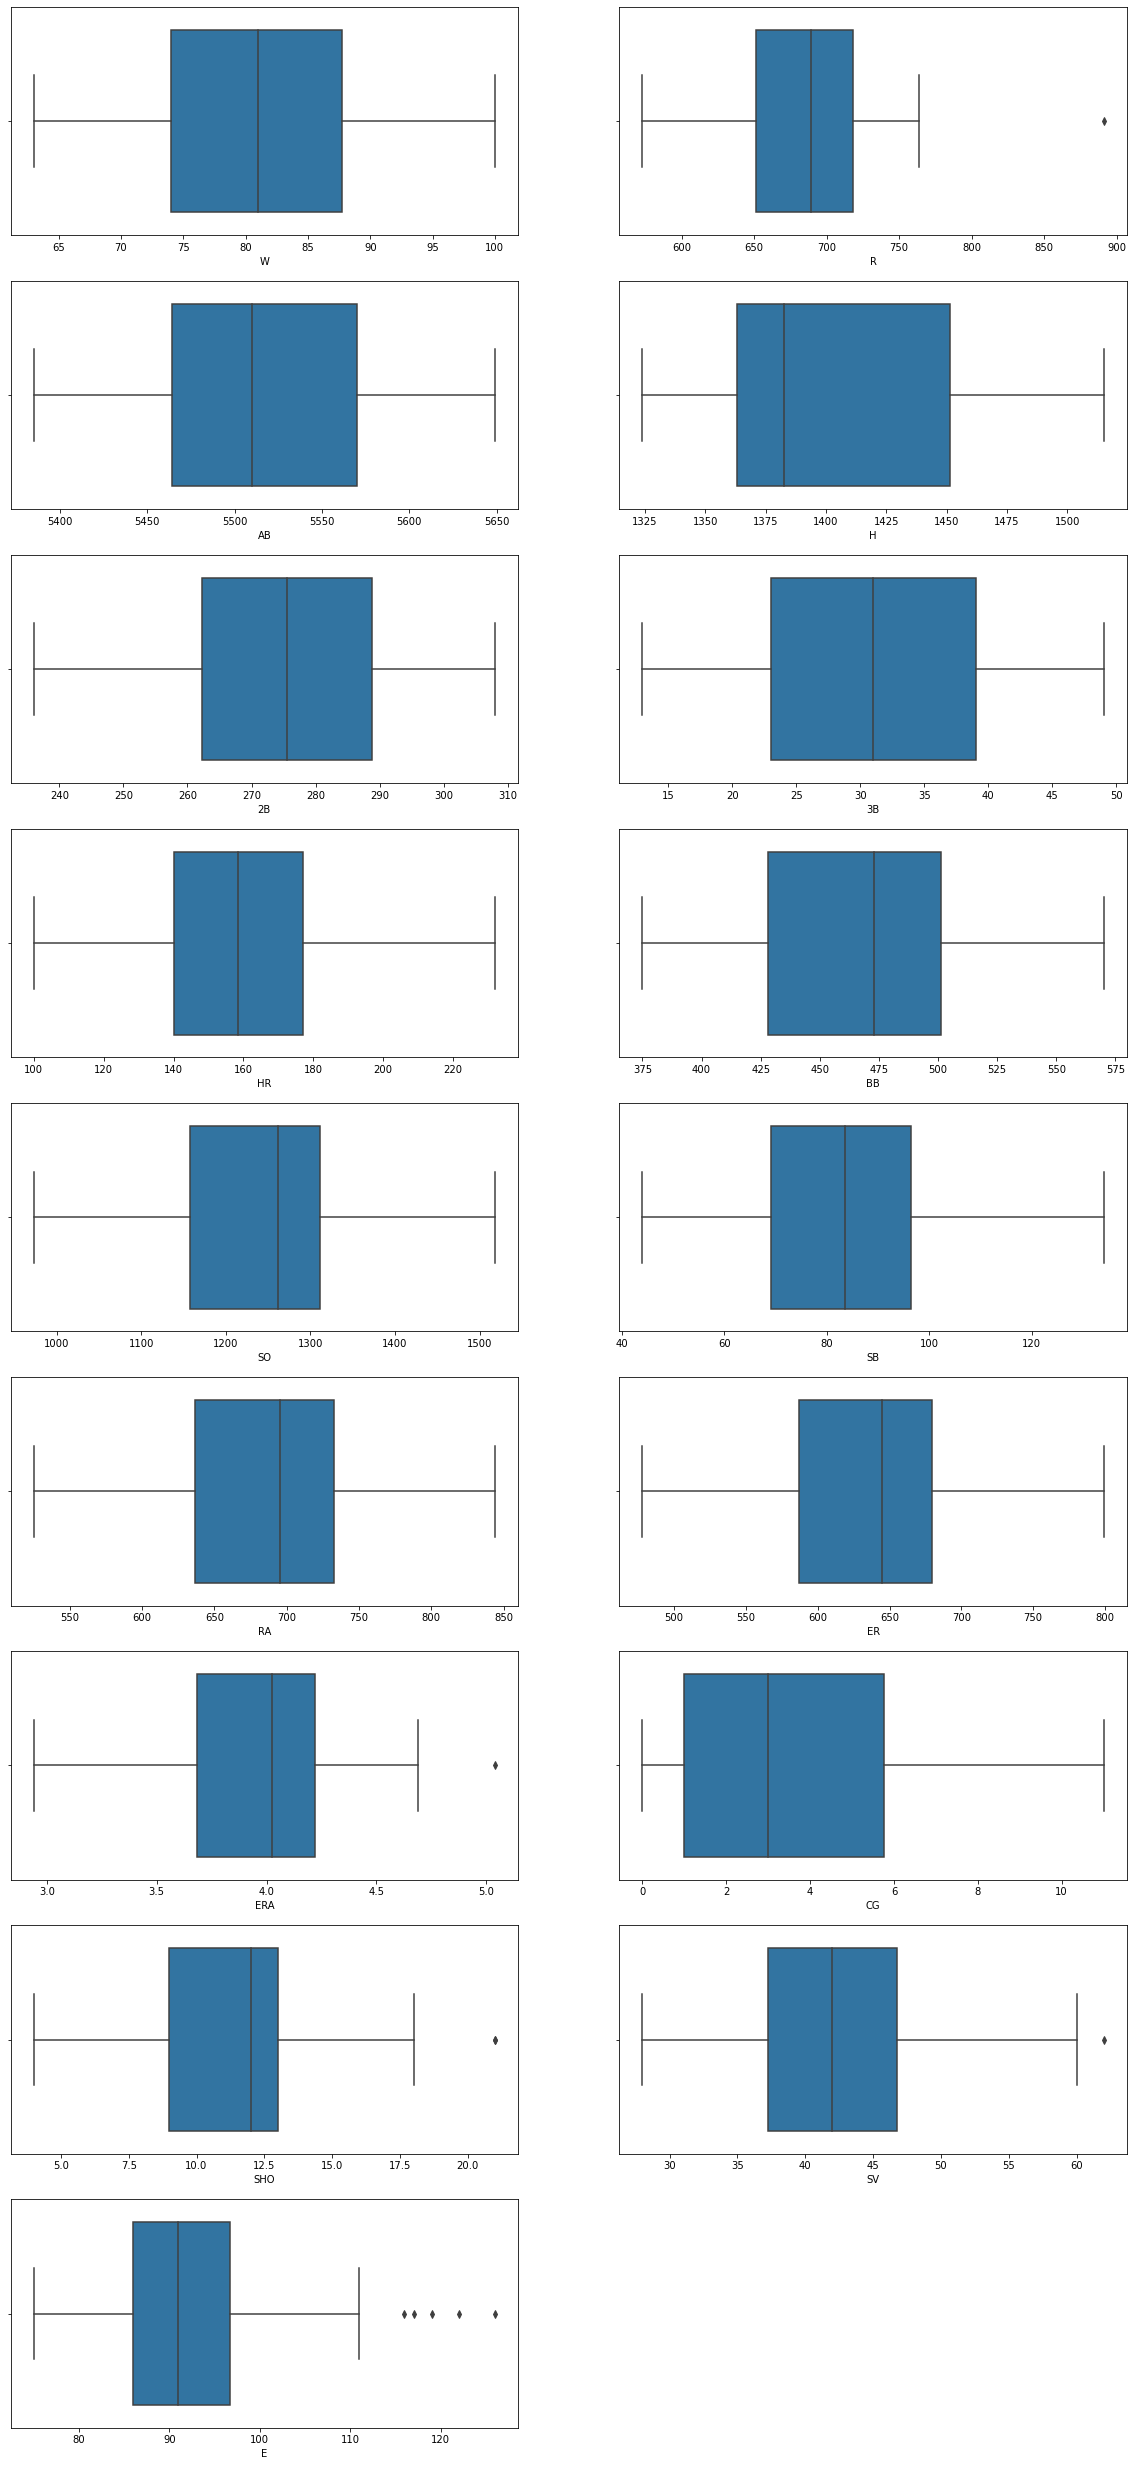

In [11]:
plt.figure(figsize=(20,100))
for i,column in enumerate(df.columns):
    plt.subplot(20,2,i+1)
    sns.boxplot(df[column])

##### There is few outliers in following column
* R
* ERA
* SHO
* W
* E

In [12]:
z_score_abs = np.abs(stats.zscore(df))
z_score_abs

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [13]:
df[z_score_abs > 3].index

Int64Index([5], dtype='int64')

In [14]:
df.shape

(30, 17)

In [15]:
df.drop(df[z_score_abs > 3].index,axis=0,inplace=True)

In [16]:
df.shape

(29, 17)

# Spliting Feature Variable

In [17]:
X = df.drop('W',axis=1)
X.shape

(29, 16)

In [18]:
y = df['W']
y.shape

(29,)

In [19]:
X.skew().abs().sort_values()

ERA    0.016693
RA     0.018155
ER     0.018461
3B     0.090124
BB     0.151193
AB     0.169573
R      0.215364
SO     0.233815
2B     0.335304
HR     0.450862
SB     0.494966
SHO    0.526943
SV     0.627480
H      0.783772
E      0.840271
CG     0.854980
dtype: float64

#### We can there very less skewnewss so leaving it

# Train test split

In [20]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,random_state=42,shuffle=True)

# Modeal Building

In [21]:
linearRegression = LinearRegression()

In [22]:
linearRegression.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = linearRegression.predict(X_test)

In [24]:
mean_absolute_error(y_test,y_pred)

5.690517488444129

In [25]:
mean_squared_error(y_test,y_pred)

66.98759406192892

In [26]:
r2_score(y_test,y_pred)

0.3906756651558484

### CV

In [27]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(LinearRegression(),X,y,cv=kFold,scoring='r2',n_jobs=-1)

In [28]:
print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.45862706602116815
std: 0.4964938221090421


# Ridge

In [29]:
ridge = Ridge()

In [30]:
ridge.fit(X_train,y_train)

Ridge()

In [31]:
y_pred = ridge.predict(X_test)

In [32]:
mean_absolute_error(y_test,y_pred)

3.3532707740452867

In [33]:
mean_squared_error(y_test,y_pred)

14.010957120561379

In [34]:
r2_score(y_test,y_pred)

0.872555250751005

In [35]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(Ridge(),X,y,cv=kFold,scoring='r2',n_jobs=-1)

In [36]:
print('scors:',np.mean(scores))
print('std:',np.std(scores))

scors: 0.5122114475571906
std: 0.3324099341928829


# DecisionTreeRegressor

In [37]:
decisionTreeRegressor = DecisionTreeRegressor()

In [38]:
decisionTreeRegressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [39]:
y_pred = decisionTreeRegressor.predict(X_test)

In [40]:
mean_absolute_error(y_test,y_pred)

9.25

In [41]:
mean_squared_error(y_test,y_pred)

110.5

In [42]:
r2_score(y_test,y_pred)

-0.0051165434906197405

#### CV

In [43]:
kFold = KFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_val_score(DecisionTreeRegressor(),X,y,cv=kFold,scoring='r2',n_jobs=-1)

In [44]:
print('scores:',np.mean(scores))
print('std:',np.mean(scores))

scores: -0.4549379600326537
std: -0.4549379600326537


# KNeighborsRegressor

In [45]:
kNeighborsRegressor = KNeighborsRegressor()

In [46]:
kNeighborsRegressor.fit(X_train,y_train)

KNeighborsRegressor()

In [47]:
y_pred = kNeighborsRegressor.predict(X_test)

In [48]:
mean_absolute_error(y_test,y_pred)

8.2

In [49]:
mean_squared_error(y_test,y_pred)

98.82999999999998

In [50]:
r2_score(y_test,y_pred)

0.1010346787947699

#### CV

In [51]:
kFold = KFold(n_splits=10,random_state=41,shuffle=True)
scores = cross_val_score(KNeighborsRegressor(),X,y,cv=kFold,scoring='r2',n_jobs=-1)

In [52]:
print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: -0.16779037710197625
std: 0.6326973052806263


# SVR

In [53]:
svr = SVR()

In [54]:
svr.fit(X_train,y_train)

SVR()

In [55]:
y_pred = svr.predict(X_test)

In [56]:
mean_absolute_error(y_test,y_pred)

9.517153795960198

In [57]:
mean_squared_error(y_test,y_pred)

109.92533827608986

In [58]:
r2_score(y_test,y_pred)

0.00011062398099048742

#### CV

In [59]:
kFold = KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(SVR(),X,y,cv=kFold,scoring='r2',n_jobs=-1)

In [60]:
print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: -0.8135468771251995
std: 0.778016368964137


# XGBRegressor

In [61]:
xgbRegressor = XGBRegressor()

In [62]:
xgbRegressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y_pred = xgbRegressor.predict(X_test)

In [64]:
mean_absolute_error(y_test,y_pred)

8.03630542755127

In [65]:
mean_squared_error(y_test,y_pred)

83.0011688363229

In [66]:
r2_score(y_test,y_pred)

0.2450149508918894

#### CV

In [67]:
kFold = KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(XGBRegressor(),X,y,cv=kFold,scoring='r2',n_jobs=-1)

In [68]:
print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.25119825099301446
std: 0.43376050624529405


# RandomForestRegressor

In [69]:
randomForestRegressor = RandomForestRegressor()

In [70]:
randomForestRegressor.fit(X_train,y_train)

RandomForestRegressor()

In [71]:
y_pred = randomForestRegressor.predict(X_test)

In [72]:
mean_absolute_error(y_test,y_pred)

7.259999999999998

In [73]:
mean_squared_error(y_test,y_pred)

74.35854999999997

In [74]:
r2_score(y_test,y_pred)

0.32362888004548074

#### CV

In [75]:
kFold = KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(RandomForestRegressor(),X,y,cv=kFold,scoring='r2',n_jobs=-1)

In [76]:
print('scores:',np.mean(scores))
print('std:',np.std(scores))

scores: 0.44608070578543335
std: 0.3674865870088186


### The best Modal is Liner Regression because we are geting maxinum accuracy 

#### Hyper Parameter Tuning

In [77]:
param_grid = {
    'fit_intercept': [True,False],
'copy_X': [True,False],
'positive': [True,False],
'normalize':[True, False],


}
gridSearchCV = GridSearchCV(LinearRegression(),param_grid=param_grid,n_jobs=-1)

In [78]:
gridSearchCV.fit(X_train,y_train)

GridSearchCV(estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [79]:
gridSearchCV.best_score_

0.28946625120548414

In [80]:
gridSearchCV.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True, 'positive': True}

# Saving modal 

In [81]:
pickle.dump(linearRegression,open('linear.pkl','wb'))